# Import Important Libraries 

### pandas
### numpy
### Seaborn
### Matplotlib
### datatime

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime  as dt
import matplotlib.pyplot as plt

### Read the csv file 

In [2]:
df = pd.read_csv(r"C:\Users\zabiz\Downloads\Elevento\Online Retails/Online Retail.csv")

### Explore the data

In [3]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom


### Check the total Number of rows and columns

In [4]:
df.shape

(541909, 8)

### Check Null Values 

In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Drop Null Vales

In [6]:
df = df.dropna()

### Again Check the Null Values ( Successfully Drop the Null value)

In [7]:
df.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

### Now Check the Total Number of Rows and Columns

In [8]:
df.shape

(406829, 8)

### Check the outlier in the Dataset through BoxPlot 

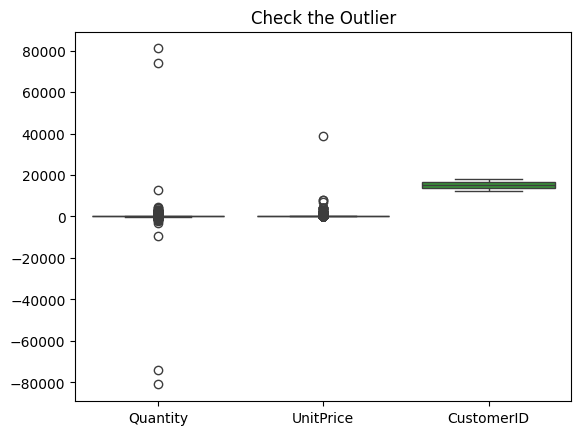

In [9]:
sns.boxplot(data=df)
plt.title("Check the Outlier")
plt.show()

### Calculate the Total Price / Total Amount

In [10]:
df["TotalAmount"] = df["Quantity"]*df["UnitPrice"]

### Check the Total Price

In [11]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/01/2010 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/01/2010 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/01/2010 08:26:00,3.39,17850.0,United Kingdom,20.34


### Convert 'InvoiceDate' to datetime

In [12]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], dayfirst=True, errors='coerce')
start_date = df['InvoiceDate'].min()
end_date = df['InvoiceDate'].max()

### Find dataset start and end date

In [13]:
print("📅 Start Date:", start_date)
print("📅 End Date:", end_date)

📅 Start Date: 2010-01-12 08:26:00
📅 End Date: 2011-12-10 17:19:00


### [Calculate Recency] , [Customer-wise last purchase dat],  [Recency in days (how recently the customer purchased)]

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
reference_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
recency = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()
recency['Recency'] = (reference_date - recency['InvoiceDate']).dt.days
print(recency.head())


   CustomerID         InvoiceDate  Recency
0     12346.0                 NaT      NaN
1     12347.0 2011-09-06 13:01:00     96.0
2     12348.0 2011-05-04 10:47:00    221.0
3     12349.0                 NaT      NaN
4     12350.0 2011-02-02 16:01:00    312.0


### Calculate Frequency

In [15]:
frequency = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index()
frequency.columns = ['CustomerID', 'Frequency']

### print the Frequency

In [16]:
print(frequency.head())

   CustomerID  Frequency
0     12346.0          2
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1


### Calculate Monetary Value

In [17]:
monetary = df.groupby('CustomerID')['TotalAmount'].sum().reset_index()
monetary.columns = ['CustomerID', 'Monetary']

### Print the monetary

In [18]:
print(monetary.head())

   CustomerID  Monetary
0     12346.0      0.00
1     12347.0   4310.00
2     12348.0   1797.24
3     12349.0   1757.55
4     12350.0    334.40


### Combine Recency, Frequency, Monetary

In [19]:
rfm = recency.merge(frequency, on='CustomerID')
rfm = rfm.merge(monetary, on='CustomerID')

### Print the rfm

In [20]:
print(rfm.head())

   CustomerID         InvoiceDate  Recency  Frequency  Monetary
0     12346.0                 NaT      NaN          2      0.00
1     12347.0 2011-09-06 13:01:00     96.0          7   4310.00
2     12348.0 2011-05-04 10:47:00    221.0          4   1797.24
3     12349.0                 NaT      NaN          1   1757.55
4     12350.0 2011-02-02 16:01:00    312.0          1    334.40


### Assign RFM Scores (1-5)

In [31]:
rfm['R_Score'] = pd.qcut(rfm['Recency'].rank(method="first"), 5, labels=[5,4,3,2,1]).astype("float")

rfm['R_Score'] = rfm['R_Score'].fillna(3).astype(int)

rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype("float")

rfm['F_Score'] = rfm['F_Score'].fillna(3).astype(int)

rfm['M_Score'] = pd.qcut(rfm['Monetary'].rank(method="first"), 5, labels=[1,2,3,4,5]).astype("float")

rfm['M_Score'] = rfm['M_Score'].fillna(3).astype(int)

rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
                                                                                           

### Print the Assign RFM Scores (1-5)

In [32]:
print(rfm[['CustomerID','Recency','Frequency','Monetary','R_Score','F_Score','M_Score','RFM_Score']].head())

   CustomerID  Recency  Frequency  Monetary  R_Score  F_Score  M_Score  \
0     12346.0      NaN          2      0.00        3        2        1   
1     12347.0     96.0          7   4310.00        3        4        5   
2     12348.0    221.0          4   1797.24        2        3        4   
3     12349.0      NaN          1   1757.55        3        1        4   
4     12350.0    312.0          1    334.40        1        1        2   

  RFM_Score  
0       321  
1       345  
2       234  
3       314  
4       112  


### Combine into one RFM segment (string) and RFM score (numeric)

In [ ]:

rfm['RFM_Segment'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)
rfm['RFM_Score'] = rfm[['R_Score','F_Score','M_Score']].sum(axis=1)

print(rfm[['CustomerID','RFM_Segment','RFM_Score']].head())


### Define Customer Groups

In [23]:
def rfm_group(score):
    if score >= 12:
        return "Champions"
    elif score >= 9:
        return "Loyal Customers"
    elif score >= 6:
        return "At-Risk"
    else:
        return "Lost Customers"

rfm['CustomerGroup'] = rfm['RFM_Score'].apply(rfm_group)
print(rfm[['CustomerID','RFM_Score','CustomerGroup']].head())


   CustomerID  RFM_Score    CustomerGroup
0     12346.0          6          At-Risk
1     12347.0         12        Champions
2     12348.0          9  Loyal Customers
3     12349.0          8          At-Risk
4     12350.0          4   Lost Customers


### Save The File After Analyze the data

In [24]:
rfm.to_csv("rfm_scores.csv", index=False, sep=",", encoding="utf-8")

### 1️⃣ Bar Chart → Count of Customers per Segment

C:\Users\zabiz\AppData\Local\Temp\ipykernel_14736\150063036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='CustomerGroup', order=rfm['CustomerGroup'].value_counts().index, palette="Set2",orient='h')


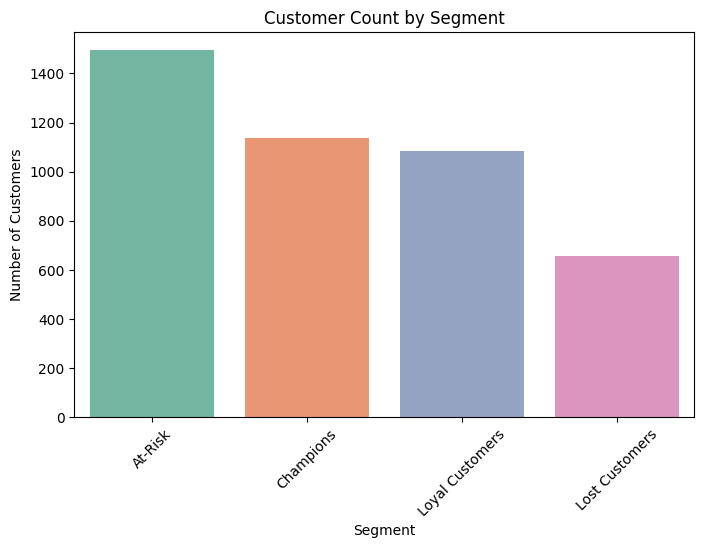

In [25]:
plt.figure(figsize=(8,5))
sns.countplot(data=rfm, x='CustomerGroup', order=rfm['CustomerGroup'].value_counts().index, palette="Set2",orient='h')
plt.title('Customer Count by Segment')
plt.ylabel('Number of Customers')
plt.xlabel('Segment')
plt.xticks(rotation=45)
plt.show()

### 2️⃣ Heatmap → Recency vs Frequency (colored by Monetary)

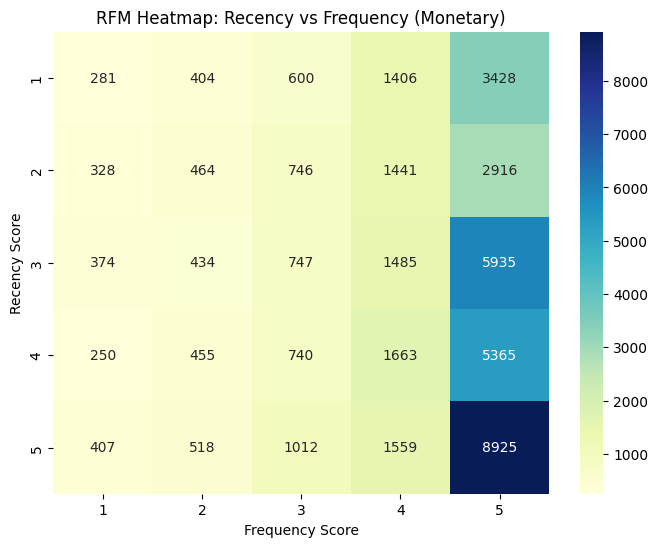

In [26]:
heatmap_data = rfm.pivot_table(index='R_Score', columns='F_Score', values='Monetary', aggfunc='mean')
plt.figure(figsize=(8,6))
sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('RFM Heatmap: Recency vs Frequency (Monetary)')
plt.ylabel('Recency Score')
plt.xlabel('Frequency Score')
plt.show()

### 3️⃣ Scatter Plot → Frequency vs Monetary

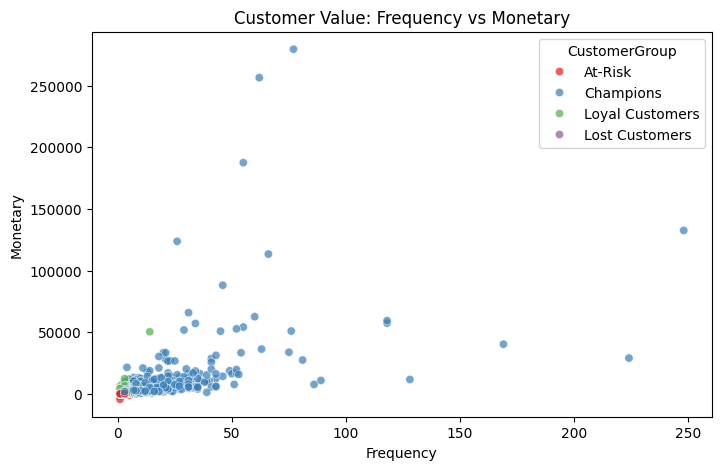

In [27]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=rfm, x='Frequency', y='Monetary', hue='CustomerGroup', palette="Set1", alpha=0.7)
plt.title('Customer Value: Frequency vs Monetary')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.show()

### 4️⃣ Pie Chart → Customer Distribution by Segment

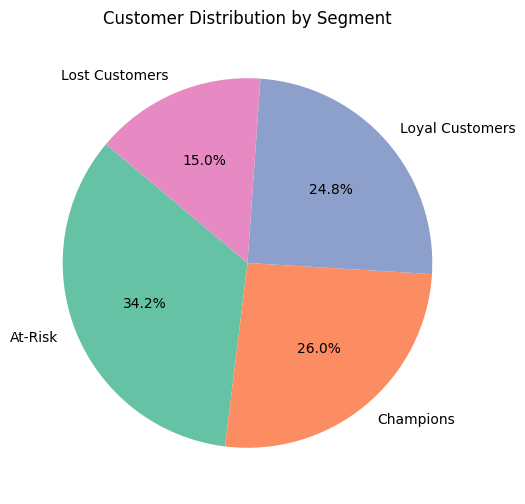

In [28]:
segment_counts = rfm['CustomerGroup'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(segment_counts, labels=segment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Customer Distribution by Segment')
plt.show()

### 5️⃣ Line Chart → Average Monetary by Recency Score

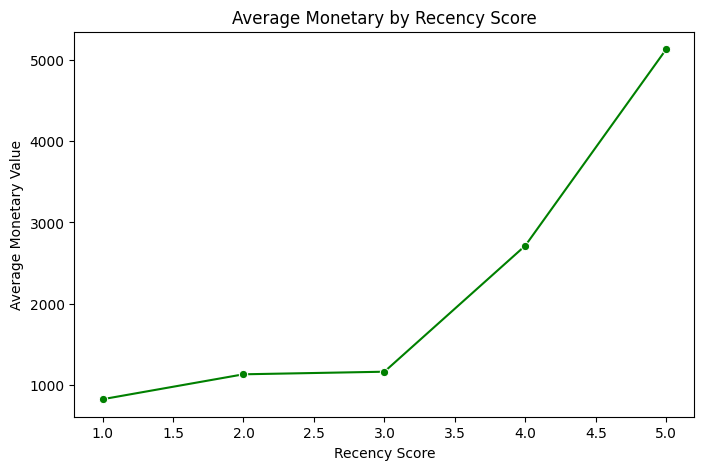

In [29]:
avg_monetary = rfm.groupby('R_Score')['Monetary'].mean().reset_index()
plt.figure(figsize=(8,5))
sns.lineplot(data=avg_monetary, x='R_Score', y='Monetary', marker='o', color='green')
plt.title('Average Monetary by Recency Score')
plt.xlabel('Recency Score')
plt.ylabel('Average Monetary Value')
plt.show()

### 6️⃣ Interactive Bubble Chart → Recency vs Frequency vs Monetary (Plotly)

C:\Users\zabiz\AppData\Local\Temp\ipykernel_14736\2464053110.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


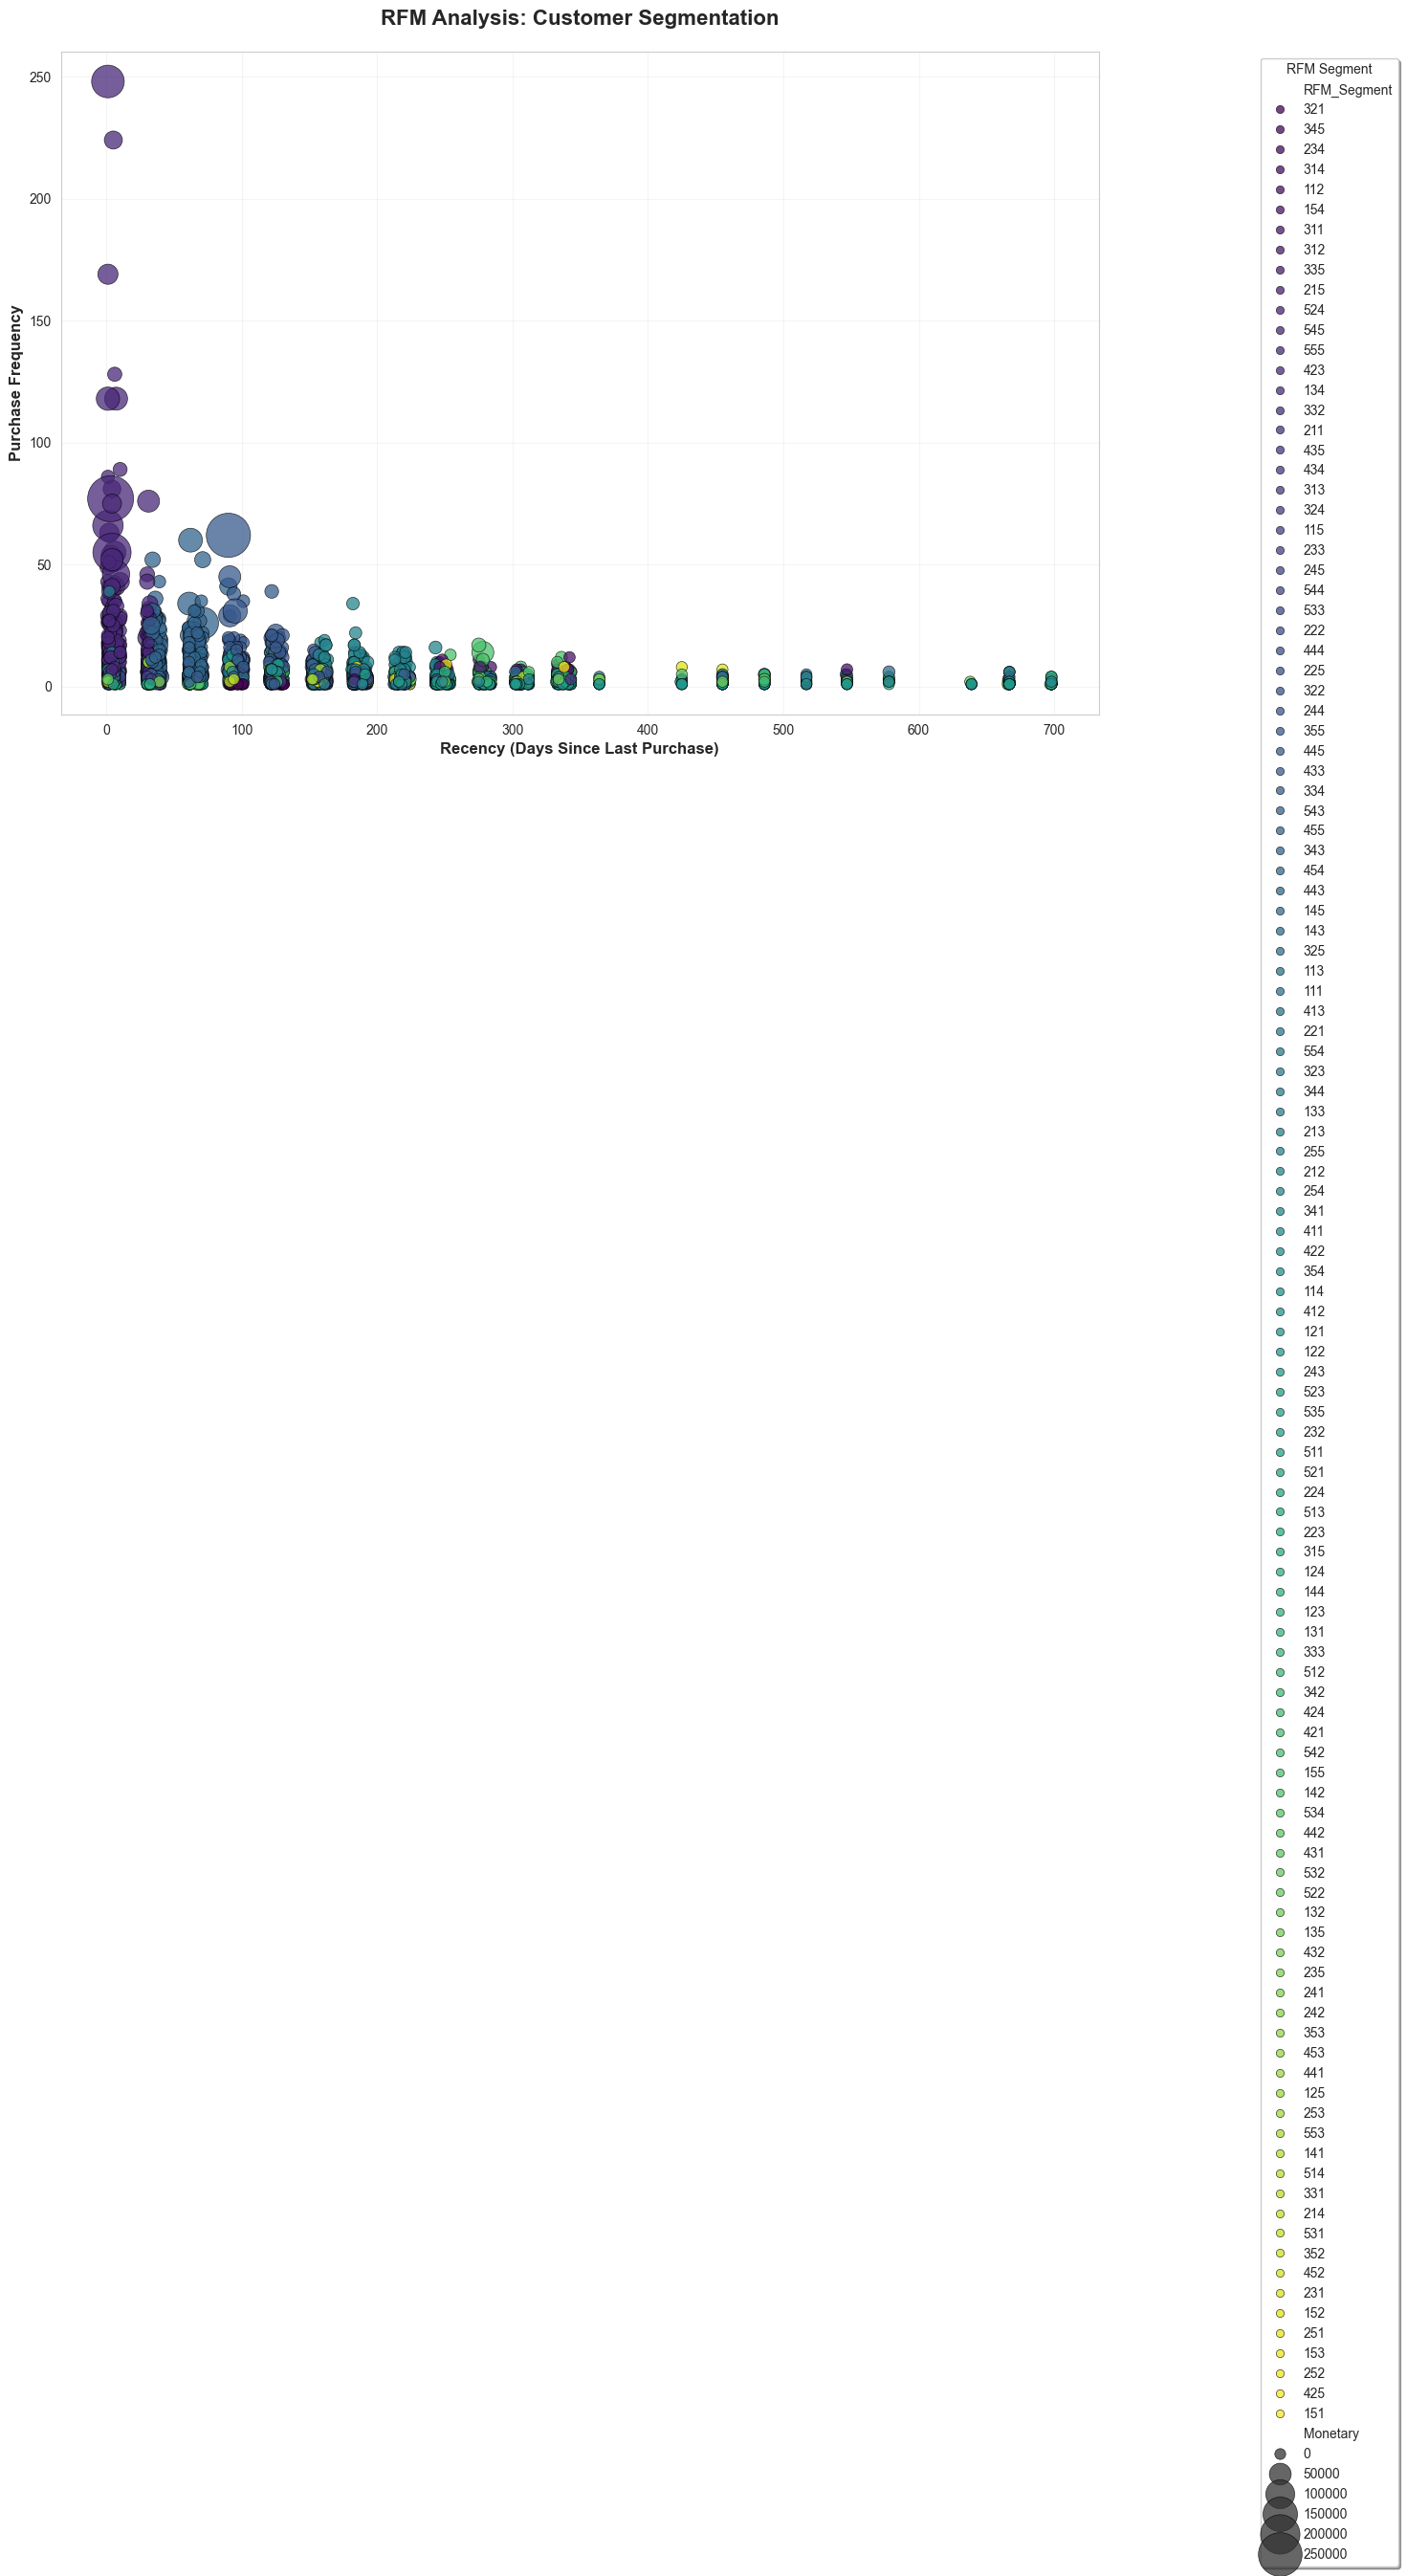

In [30]:
sns.set_style("whitegrid")
plt.figure(figsize=(14, 9))
scatter = sns.scatterplot(data=rfm, x='Recency', y='Frequency', size='Monetary', hue='RFM_Segment', sizes=(50, 1200), alpha=0.75, palette='viridis', edgecolor='black', linewidth=0.5)
plt.title('RFM Analysis: Customer Segmentation', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Recency (Days Since Last Purchase)', fontsize=12, fontweight='bold')
plt.ylabel('Purchase Frequency', fontsize=12, fontweight='bold')
plt.legend(bbox_to_anchor=(1.15, 1), loc='upper left', title='RFM Segment', frameon=True, fancybox=True, shadow=True)
plt.grid(True, alpha=0.2)
plt.tight_layout()
plt.show()

# 🎯 RFM Analysis Project: Customer Segmentation

## ✅ **Strengths**

- **Clean separation** of Recency, Frequency, and Monetary metrics
- **Safe handling** of NaN values and rank-based scoring
- **Easy-to-read** RFM scores and customer segments
- **Step-by-step** logical flow with clear comments

## 🚀 **Opportunities for Improvement**

- **Modularize the code** for scalability
- **Add visualizations** like heatmaps, bar charts, and scatter plots to make insights visually compelling
- **Export to Excel or CSV** in Tableau-friendly format for dashboard building

## 📊 **Impact**

### 🎯 **Customer Segmentation**
Helps identify:
- **Champions** 🏆
- **Loyal Customers** 💎
- **At-Risk** ⚠️
- **Lost Customers** 📉

### 📈 **Marketing Actions**
Tailor strategies based on RFM scores:
- Targeted **promotions**
- Personalized **discounts**
- Custom **engagement campaigns**

### 📋 **Business Intelligence Ready**
- Clean, well-prepared dataset
- Ready for **dashboards** and **reporting**
- Actionable insights for decision-making

---

**✨ Next Steps:** Enhance visual storytelling and integrate with BI tools for real-time customer analytics!